## 1. 공공데이터에서 gender, weight, height, blood_sugar로 새롭게 df 구성

In [1]:
try:
    from utils import *
except ModuleNotFoundError:
    !wget https://raw.githubusercontent.com/dglee6257/Dataprocessing/main/utils.py -O ./utils.py
    from utils import *


df = read_excel("공공데이터.xlsx")
df

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
2996,7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
2997,7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0
2998,7652,42,1,9,180,90,97.0,148,90,101,235,232,43.0,145,16.6,0.7,1,1


In [2]:
df.columns

Index(['no', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'systolic', 'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides',
       'HDL', 'LDL', 'hemoglobin', 'serum', 'smoking', 'drinking'],
      dtype='object')

In [3]:
new_column = ["gender", "weight", "height", "blood_sugar"]
new_df = df.loc[:, new_column]
new_df

,gender,weight,height,blood_sugar
0,1,60,165,90
1,2,50,155,110
2,1,85,185,86
3,1,80,165,250
4,2,50,150,104
...,...,...,...,...
2995,2,55,155,97
2996,1,60,155,90
2997,1,60,165,81
2998,1,90,180,101


## 2. 교재와 동일하게 남자 M으로 여자는 F로 표시

In [4]:
new_df.loc[new_df["gender"] == 1, ["gender"]] = "M"
new_df.loc[new_df["gender"] == 2, ["gender"]] = "F"

In [5]:
new_df

,gender,weight,height,blood_sugar
0,M,60,165,90
1,F,50,155,110
2,M,85,185,86
3,M,80,165,250
4,F,50,150,104
...,...,...,...,...
2995,F,55,155,97
2996,M,60,155,90
2997,M,60,165,81
2998,M,90,180,101


## 3. blood_sugar 수치가 120이상인 사람/미만인 사람 수 count

In [6]:
# blood_sugar 수치가 120이상인 사람
count1 = new_df.loc[new_df["blood_sugar"] >= 120, :].shape[0]
count1

421

In [7]:
# blood_sugar 수치가 120미만인 사람
count2 = new_df.loc[new_df["blood_sugar"] < 120, :].shape[0]
count2

2579

## 4. BMI(몸무계 / 키^2)가 25이상 비만, 23~25 과체중 23미만 정상 count

In [8]:
new_df["BMI"] = new_df["weight"] / (new_df["height"] / 100) ** 2
new_df

,gender,weight,height,blood_sugar,BMI
0,M,60,165,90,22.038567
1,F,50,155,110,20.811655
2,M,85,185,86,24.835646
3,M,80,165,250,29.384757
4,F,50,150,104,22.222222
...,...,...,...,...,...
2995,F,55,155,97,22.892820
2996,M,60,155,90,24.973985
2997,M,60,165,81,22.038567
2998,M,90,180,101,27.777778


In [9]:
# 비만(BMI >= 25)
count3 = new_df.loc[new_df["BMI"] >= 25, :].shape[0]
count3

1080

In [10]:
# 과체중(23 <= BMI < 25)
count4 = new_df.loc[(new_df["BMI"] >= 23) & (new_df["BMI"] < 25), :].shape[0]
count4

688

In [11]:
# 정상(BMI < 23)
count5 = new_df.loc[(new_df["BMI"] < 23), :].shape[0]
count5

1232

## 5. sns.barplot으로 표시

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = new_df.copy()
data

,gender,weight,height,blood_sugar,BMI
0,M,60,165,90,22.038567
1,F,50,155,110,20.811655
2,M,85,185,86,24.835646
3,M,80,165,250,29.384757
4,F,50,150,104,22.222222
...,...,...,...,...,...
2995,F,55,155,97,22.892820
2996,M,60,155,90,24.973985
2997,M,60,165,81,22.038567
2998,M,90,180,101,27.777778


### 남녀에 따른 120이상/미만

In [14]:
bg_string = {0: "blood sugar < 120", 1: "blood sugar >= 120"}
data["bg_check"] = (data["blood_sugar"] >= 120).astype(int).apply(lambda x: bg_string[x])
data

,gender,weight,height,blood_sugar,BMI,bg_check
0,M,60,165,90,22.038567,blood sugar < 120
1,F,50,155,110,20.811655,blood sugar < 120
2,M,85,185,86,24.835646,blood sugar < 120
3,M,80,165,250,29.384757,blood sugar >= 120
4,F,50,150,104,22.222222,blood sugar < 120
...,...,...,...,...,...,...
2995,F,55,155,97,22.892820,blood sugar < 120
2996,M,60,155,90,24.973985,blood sugar < 120
2997,M,60,165,81,22.038567,blood sugar < 120
2998,M,90,180,101,27.777778,blood sugar < 120


<Axes: xlabel='gender', ylabel='blood_sugar'>

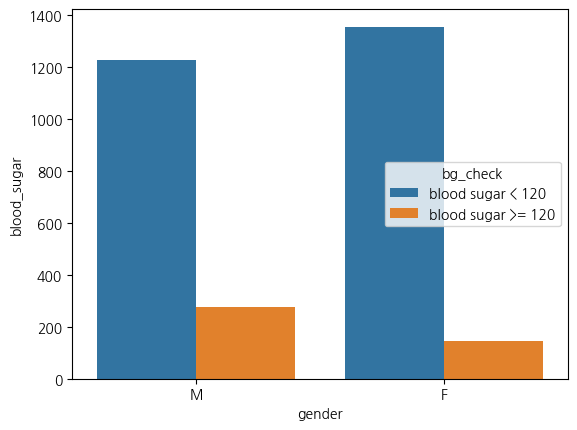

In [15]:
sns.barplot(data, x="gender", y="blood_sugar", hue="bg_check", estimator="size")

### 남녀에 따른 정상/과체중/미만 

In [16]:
def rank_weight(BMI):
    if BMI < 23:
        return "BMI < 23"
    elif BMI < 25:
        return "23 <= BMI < 25"
    else:
        return "BMI >= 25"

In [17]:
data["rank_BMI"] = data["BMI"].apply(rank_weight)
data

,gender,weight,height,blood_sugar,BMI,bg_check,rank_BMI
0,M,60,165,90,22.038567,blood sugar < 120,BMI < 23
1,F,50,155,110,20.811655,blood sugar < 120,BMI < 23
2,M,85,185,86,24.835646,blood sugar < 120,23 <= BMI < 25
3,M,80,165,250,29.384757,blood sugar >= 120,BMI >= 25
4,F,50,150,104,22.222222,blood sugar < 120,BMI < 23
...,...,...,...,...,...,...,...
2995,F,55,155,97,22.892820,blood sugar < 120,BMI < 23
2996,M,60,155,90,24.973985,blood sugar < 120,23 <= BMI < 25
2997,M,60,165,81,22.038567,blood sugar < 120,BMI < 23
2998,M,90,180,101,27.777778,blood sugar < 120,BMI >= 25


<Axes: xlabel='gender', ylabel='BMI'>

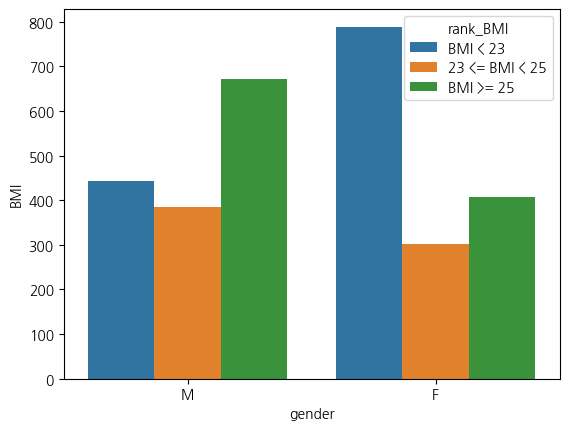

In [18]:
sns.barplot(data, x="gender", y="BMI", hue="rank_BMI", estimator="size")